## Fell + Spohrleder (2014) n-gram Baseline Replication
### Preprocessing and n-gram Feature Extraction
1. extract unigram, bigram, and trigram features from the lyrics
- make lowercase, remove punctuation (except apostrophes)
- contractions like "don't" should not be split during tokenization
2. calculate n-gram tf-idf for all n-grams with genres (cat[n]) as documents (frequency +1 per tracks that contiain the n-gram) 
3. rank all n-grams by tf-idf score within each genre
4. "downrank artist specific ngrams" by removing n-grams that occur in less than 50 different artists
5. per genre and n, select top 100 n-grams as count features (produces 2700 features max for 9 genres; might be less due to overlaps)
### Classification Results

In [1]:
import pickle
import pandas as pd
import numpy as np

def show_top_coefficients_per_genre(coeffs, top_n=10):
    genres = coeffs.columns
    for genre in genres:
        print(f"Top {top_n} coefficients for genre: {genre.upper()}")
        top_coeffs = coeffs[genre].abs().sort_values(ascending=False).head(top_n)
        for feature, value in top_coeffs.items():
            print(f"{feature} ({coeffs.at[feature, genre]:.3f})")
        print("\n")


def report_model_evaluation(experiment):
    experiment.show_train_test_genrefreq_comparison()
    print("Random Baseline Evaluation:")
    print("-" * 40)
    experiment.show_random_baseline_evaluation()

    print("\n\n")
    print("Tuning History:")
    print("-" * 40)
    experiment.show_tuning_history()

    print("\n\n")
    print("Model evaluation on Holdout Set:")
    print("-" * 40)
    experiment.show_model_evaluation()

    print("\n\n")
    print("Top Coefficients per Genre:")
    print("-" * 40)
    show_top_coefficients_per_genre(experiment.model_coefficients, top_n=10)


cat5 = pickle.load(open("../../models/cat5_FS_experiment/complete_experiment.pkl", "rb"))
cat12 = pickle.load(open("../../models/cat12_FS_experiment/complete_experiment.pkl", "rb"))

Random Baseline Evaluation:
----------------------------------------
F1 macro: 0.203
Precision macro: 0.203
Recall macro: 0.203
Cohen's kappa: 0.003



Tuning History:
----------------------------------------
Selected model parameters:
  C: 0.410
  l1_ratio: 0.256
  target_ratio: 4.355
    iteration  score_mean  score_se          C  l1_ratio  target_ratio
0           0    0.458149  0.001034   0.410225  0.256112      4.354683
1           0    0.417378  0.003205   0.001417  0.090582      1.627028
2           0    0.364967  0.002647  41.632276  0.921394      1.150647
3           0    0.391413  0.003306  18.828123  0.362920      1.396088
4           0    0.458388  0.001521   1.506841  0.717724      3.963507
5           0    0.449938  0.001781   7.698048  0.544542      3.053644
6           0    0.426874  0.001392   0.003856  0.436834      2.324845
7           0    0.451524  0.001593   0.021025  0.102930      3.138698
8           0    0.434008  0.001497   0.040814  0.880536      2.074257
9  

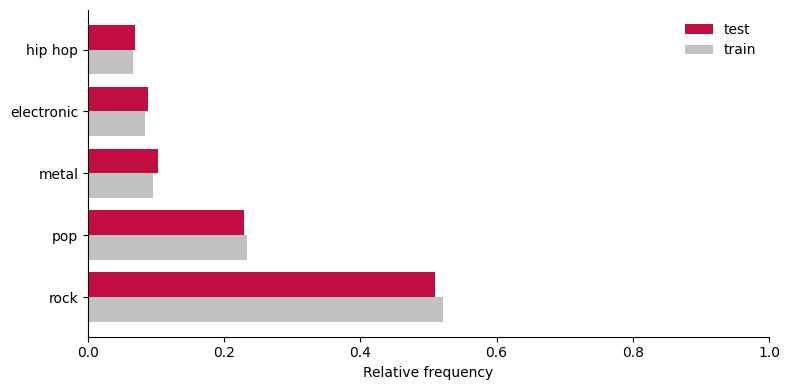

In [2]:
report_model_evaluation(cat5)

Random Baseline Evaluation:
----------------------------------------
F1 macro: 0.089
Precision macro: 0.090
Recall macro: 0.090
Cohen's kappa: -0.001



Tuning History:
----------------------------------------
Selected model parameters:
  C: 90.734
  l1_ratio: 0.249
  target_ratio: 2.205
    iteration  score_mean  score_se          C  l1_ratio  target_ratio
0           0    0.229355  0.000301   0.410225  0.256112      4.354683
1           0    0.219955  0.001816   0.001417  0.090582      1.627028
2           0    0.211101  0.001700  41.632276  0.921394      1.150647
3           0    0.219317  0.001549  18.828123  0.362920      1.396088
4           0    0.232141  0.001054   1.506841  0.717724      3.963507
5           0    0.236603  0.000867   7.698048  0.544542      3.053644
6           0    0.214556  0.001110   0.003856  0.436834      2.324845
7           0    0.232423  0.000564   0.021025  0.102930      3.138698
8           0    0.235278  0.001093   0.040814  0.880536      2.074257
9

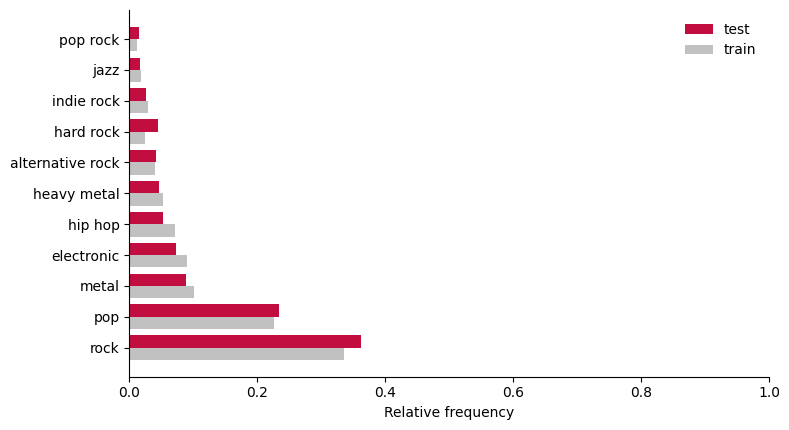

In [3]:
report_model_evaluation(cat12)